### 激活函数的归一化
在实践中，归一化激活函数的输入$z^{[l]}$是更常见的做法。

以神经网络中某一层l为例，我们可以得到激活函数的输入：$z^{(1)}$,$z^{(2)}$,...,$z^{(m)}$

（假设有m个样本），其归一化的步骤（即Z变换）和归一化网络输入是一样的：

$\mu=\frac{1}{m}\sum z^{(i)}$
 
$\sigma ^2=\frac{1}{m}\sum (z^{(i)} - \mu)^2$

$z^{(i)}_{norm}=\frac{z^{(i)}-\mu}{\sqrt{ \sigma^2 + \epsilon}}$

（分母加上$\epsilon$防止除0）


将$z^{(i)}$转换成均值为0，方差为1的标准正态分布（前提假设：$z^{(i)}$服从正态分布）。
 
但是有的时候，我们并不希望每个$z^{(i)}$的均值都为0，方差都为1，因为不同的分布可能会更有意义。比如对于sigmoid激活函数来说，我们可能希望$z^{(i)}$的方差更大一些，而不是全部集中在S型曲线中段近似线性的部分：
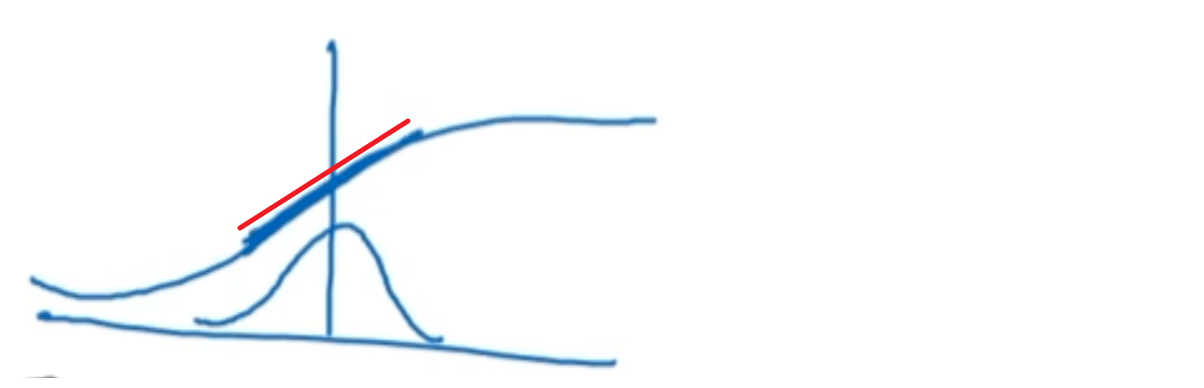

因此，引进两个新的参数γ,$\gamma$,$\beta$作为调整（此处的$\beta$不同于momentum中的$\beta$）：

$\widetilde{z}^{(i)}=\gamma z^{(i)}_{norm} + \beta$

当$\gamma=\sqrt{ \sigma^2 + \epsilon}$,$\beta=\mu$时，有$\widetilde{z}^{(i)}=z^{(i)}_{norm}$。

可以通过赋予$\gamma$和$\beta$其他的值来构造含其他均值和方差的分布。

然后我们就可以用$\widetilde{z}^{(i)}$代替$z^{(i)}$进行后续的计算。

以上便是Batch Normalization（包含对输入层的归一化）。通常简称为Batch Norm或者BN。


### 在深层网络中添加batch norm

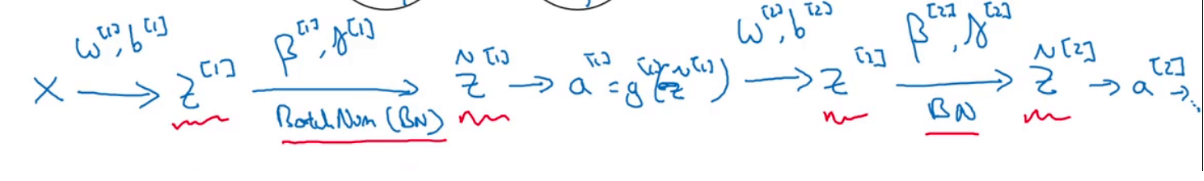

Batch Norm的存在，使得参数b失去了意义。因为$z^{[l]}=w^{[l]}a^{[l-1]}+b^{[l]}$，而Batch Norm中，$z^{[l]}$会减去其均值，此时$b^{[l]}$的作用便被消除了。  
所以我们可以省略掉参数b。$z^{[l]}$的计算简化为：$z^{[l]}=w^{[l]}a^{[l-1]}$。

#### 为什么Batch Norm可以提升学习效率呢？
Batch Norm可以让同一隐藏层的每次输入都服从均值为0，方差为1（或者是由β , γ决定的其他值）的分布，从而减少了输入的改变，使得其不会过多的受到前几层参数更新的影响。相当于每一层都可以更加独立的进行学习，尽可能的不受其他层参数的影响。这有助于加速整个网络的学习。

此外，Batch Norm还有轻微的正则化效果。因为在和mini-batch一起使用时，计算$z^{[l]}$的均值和方差只是基于总体数据集的一部分，因此会有噪声。因为噪声很小，所以正则化效果并不特别明显。可以和dropout一起使用，起到更好的正则化效果。

#### BatchNorm在测试阶段的应用
在测试阶段，测试样本可能只有一个，这种情况下用一个测试样本的均值和方差进行Batch Norm是没有意义的。

那么在测试阶段，我们怎么获得每个隐藏层$z^{[l]}$的均值和方差呢？

解决办法：在**训练阶段**计算每一个mini-batch时，同时缓存每一隐藏层的均值和方差，最终分别求其指数加权平均作为测试阶段的均值和方差。

如果测试数据足够多，也可以基于测试数据计算每个隐藏层的均值和方差。但是基于训练阶段得到的均值和方差的指数加权平均是更为常用的方法。
